In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None  # default='warn'
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
import os
import matplotlib.pyplot as plt
import sklearn

In [2]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv", index_col=0)
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv", index_col=0)

## Checking categorical variables

### Nominal
MSSubClass
MSZoning
Street
Alley
LotConfig
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exteror1st
Exteror2nd
MasVnrType
Foundation
Heating
CentralAIr
Electrical
Functional
GarageType
GarageFinish
PavedDrive
MiscFeature
SaleType
SaleCondition

### Ordinal
LotShape
LandContour
Utilities
LandSlope
ExterQual
ExterCond
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType2
HeatingQC
KitchenQual
FireplaceQu
GarageQual
GarageCond
PoolQC
Fence

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


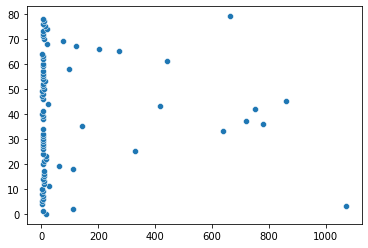

In [3]:
val_list = []
from collections import Counter
for col in train_df.columns:
    val_list.append(len(train_df[col].unique()))
    #print(f"{col}: {len(train_df[col].unique())}")
ax = sns.scatterplot(val_list, range(0,len(val_list)))

In [4]:
NOMINAL_COL = ["BsmtFinType1","Foundation","MSSubClass",
               "MSZoning",
               "Street",
               "LotConfig",
               "Neighborhood",
               "Condition1",
               "Condition2",
               "BldgType",
               "HouseStyle",
               "RoofStyle",
               "RoofMatl",
               "Exterior1st",
               "Exterior2nd",
               "MasVnrType" ,
                "Heating",
               "CentralAir",
               "Electrical",
               "Functional",
               "GarageType",
               "GarageFinish",
               "PavedDrive",
               "SaleType", "SaleCondition"]

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
ORDINAL_COL = ["LotShape", "LandContour", "Utilities", "LandSlope", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType2", "HeatingQC", "KitchenQual", "GarageQual", "GarageCond"]
NUMERICAL_COL = train_df.select_dtypes(include=numerics).columns.to_list()

In [5]:
features = train_df.pop("SalePrice")
NUMERICAL_COL.remove("SalePrice")

In [6]:
train_df.drop(["FireplaceQu","Fence","Alley","MiscFeature", "PoolQC"],axis=1, inplace = True)
test_df.drop(["FireplaceQu","Fence","Alley","MiscFeature", "PoolQC"],axis=1, inplace = True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    train_df, features, test_size=0.2, random_state=42
)

transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), 
        NOMINAL_COL),
    (OrdinalEncoder(), ORDINAL_COL),
    (MinMaxScaler(), 
        train_df.select_dtypes(include=numerics).columns)
)
print(X_train.isnull().sum().sort_values()[-14:])
for col in NOMINAL_COL:
    X_train[col].fillna(X_train[col].mode()[0],inplace=True)
    test_df[col].fillna(test_df[col].mode()[0],inplace=True)
    

for col in NOMINAL_COL:
    X_train[col].fillna(X_train[col].mode()[0],inplace=True)
    test_df[col].fillna(test_df[col].mode()[0],inplace=True)
    
for col in NUMERICAL_COL:
    X_train[col].fillna(X_train[col].mean(),inplace=True)
    test_df[col].fillna(test_df[col].mean(),inplace=True)

for col in ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType2","GarageQual","GarageCond"]:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
    
for col in ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType2","GarageQual","GarageCond","KitchenQual","Utilities"]:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])
    
X_train_norm = transformer.fit_transform(X_train)
test_df_norm = transformer.transform(test_df)


Electrical        1
MasVnrType        6
MasVnrArea        6
BsmtFinType2     28
BsmtQual         28
BsmtCond         28
BsmtExposure     28
BsmtFinType1     28
GarageYrBlt      64
GarageQual       64
GarageCond       64
GarageType       64
GarageFinish     64
LotFrontage     217
dtype: int64


In [8]:
def rmse(y_true, y_pred):    
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [9]:
y_train = y_train.astype(float)

In [10]:
tf.random.set_seed(42)

model = Sequential([
    Dense(500, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)

history = model.fit(X_train_norm, y_train, epochs=1000, verbose=0)


User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER

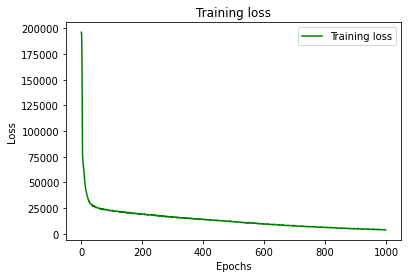

In [11]:
plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
results =model.predict(test_df_norm)

In [13]:
df_results = pd.DataFrame(columns=["Id","SalePrice"])
df_results["Id"] = test_df.index
df_results["SalePrice"] = results

In [14]:
df_results.set_index("Id", inplace=True)

In [15]:
#df_results.to_csv("Submission2.csv")